# Credit Card Fraud – Anomaly Detection & Explainability

This notebook serves as a introduction to the datatset and provides an overview of the data and dataset properties.

## Intro

In [1]:
from pathlib import Path
import pandas as pd

# path to data
data_path = Path("../datasets/archive/credit_card_transactions-ibm_v2.csv")

df = pd.read_csv(data_path)

print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset has 24386900 rows and 15 columns.


In [2]:
df.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No


## A little bit about the Data Set I am working with

The data here has almost no obfuscation and is provided in a CSV file whose schema is described in the first row. This data has more than 20 million transactions generated from a multi-agent virtual world simulation performed by IBM. The data covers 2000 (synthetic) consumers resident in the United States, but who travel the world. The data also covers decades of purchases, and includes multiple cards from many of the consumers.

Details on the generation here: https://doi.org/10.48550/arXiv.1910.03033     

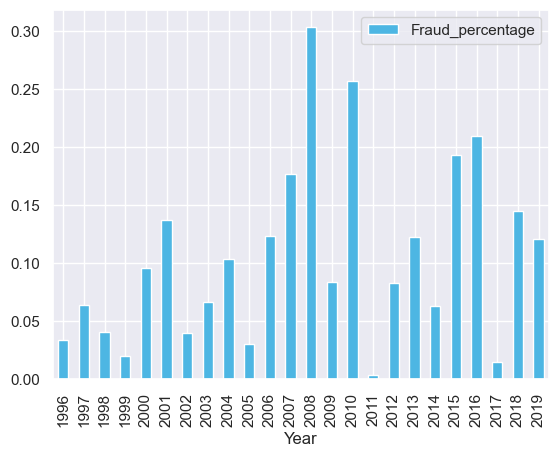

In [17]:
import matplotlib.pyplot as plt

df_fraud=df[['User','Year','Is Fraud?']].groupby(['Year','Is Fraud?']).count().reset_index()
df_fraud_dict=df_fraud.groupby('Year')['User'].sum().to_dict()
df_fraud['Total']=df_fraud['Year'].map(df_fraud_dict)
df_fraud['Fraud_percentage']=(df_fraud["User"]/df_fraud['Total'])*100
df_fraud[['Year','Is Fraud?','Fraud_percentage']]
df_fraud=df_fraud.rename(columns={'Is Fraud?':"Fraud"})
df_fraud=df_fraud[df_fraud["Fraud"]!="No"]
df_fraud.plot(x="Year",y=['Fraud','Fraud_percentage'],kind="bar")

df_no_fraud=df[['User','Year','Is Fraud?']].groupby(['Year','Is Fraud?']).count().reset_index()
df_no_fraud_dict=df_no_fraud.groupby('Year')['User'].sum().to_dict()
df_no_fraud['Total']=df_no_fraud['Year'].map(df_no_fraud_dict)
df_no_fraud['Non_Fraud_percentage']=(df_no_fraud["User"]/df_no_fraud['Total'])*100
df_no_fraud[['Year','Is Fraud?','Non_Fraud_percentage']]
df_no_fraud=df_no_fraud.rename(columns={'Is Fraud?':"No Fraud"})
df_no_fraud=df_no_fraud[df_no_fraud["No Fraud"]=="No"]

Number of fraud instances in 2008: 3710
Number of non-fraud instances in 2008: 1219750


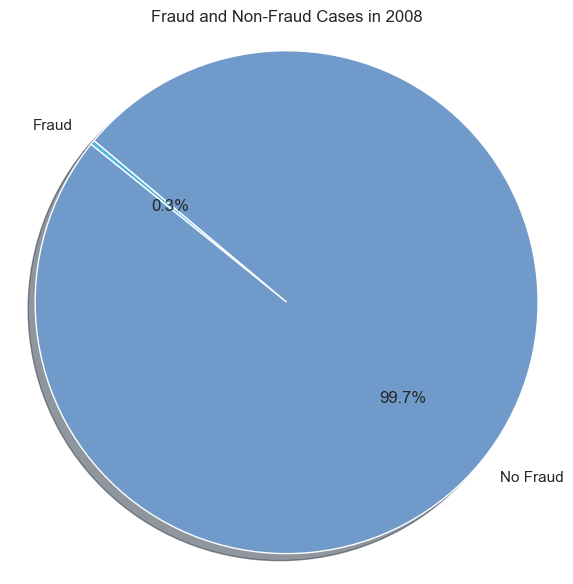

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

palette = ['#4db6e3', '#709ac9', '#947eb0', '#b76296', '#db467d']
sns.set_theme(palette=palette, style='darkgrid')

# Count the occurrences of fraud in the year 2008
fraud_2008_count = df_fraud[df_fraud['Year'] == 2008]['User'].sum()

# Count the occurences of not fraud in the year 2008
no_fraud_2008_count = df_no_fraud[df_no_fraud['Year'] == 2008]['User'].sum()

print(f"Number of fraud instances in 2008: {fraud_2008_count}")
print(f"Number of non-fraud instances in 2008: {no_fraud_2008_count}")

palette = ['#4db6e3', '#709ac9', '#947eb0', '#b76296', '#db467d']
sns.set_theme(palette=palette, style='darkgrid')

# Pie chart
sizes = [fraud_2008_count, no_fraud_2008_count]
labels = ['Fraud', 'No Fraud']

plt.figure(figsize=(6, 6)) # Increased figure size for better readability
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        startangle=140, colors=palette, shadow=True)

plt.title('Fraud and Non-Fraud Cases in 2008')
plt.axis('equal')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [24]:
# saving the new dataset (year == 2008) to folder

df_1 = df[(df['Year']==2008)]
df_1.to_csv("../datasets/archive/credit_card_transactions-ibm_v2_2008.csv", index=False)

In [25]:
print(f"The dataset has {df_1.shape[0]} rows and {df_1.shape[1]} columns.")

The dataset has 1223460 rows and 15 columns.


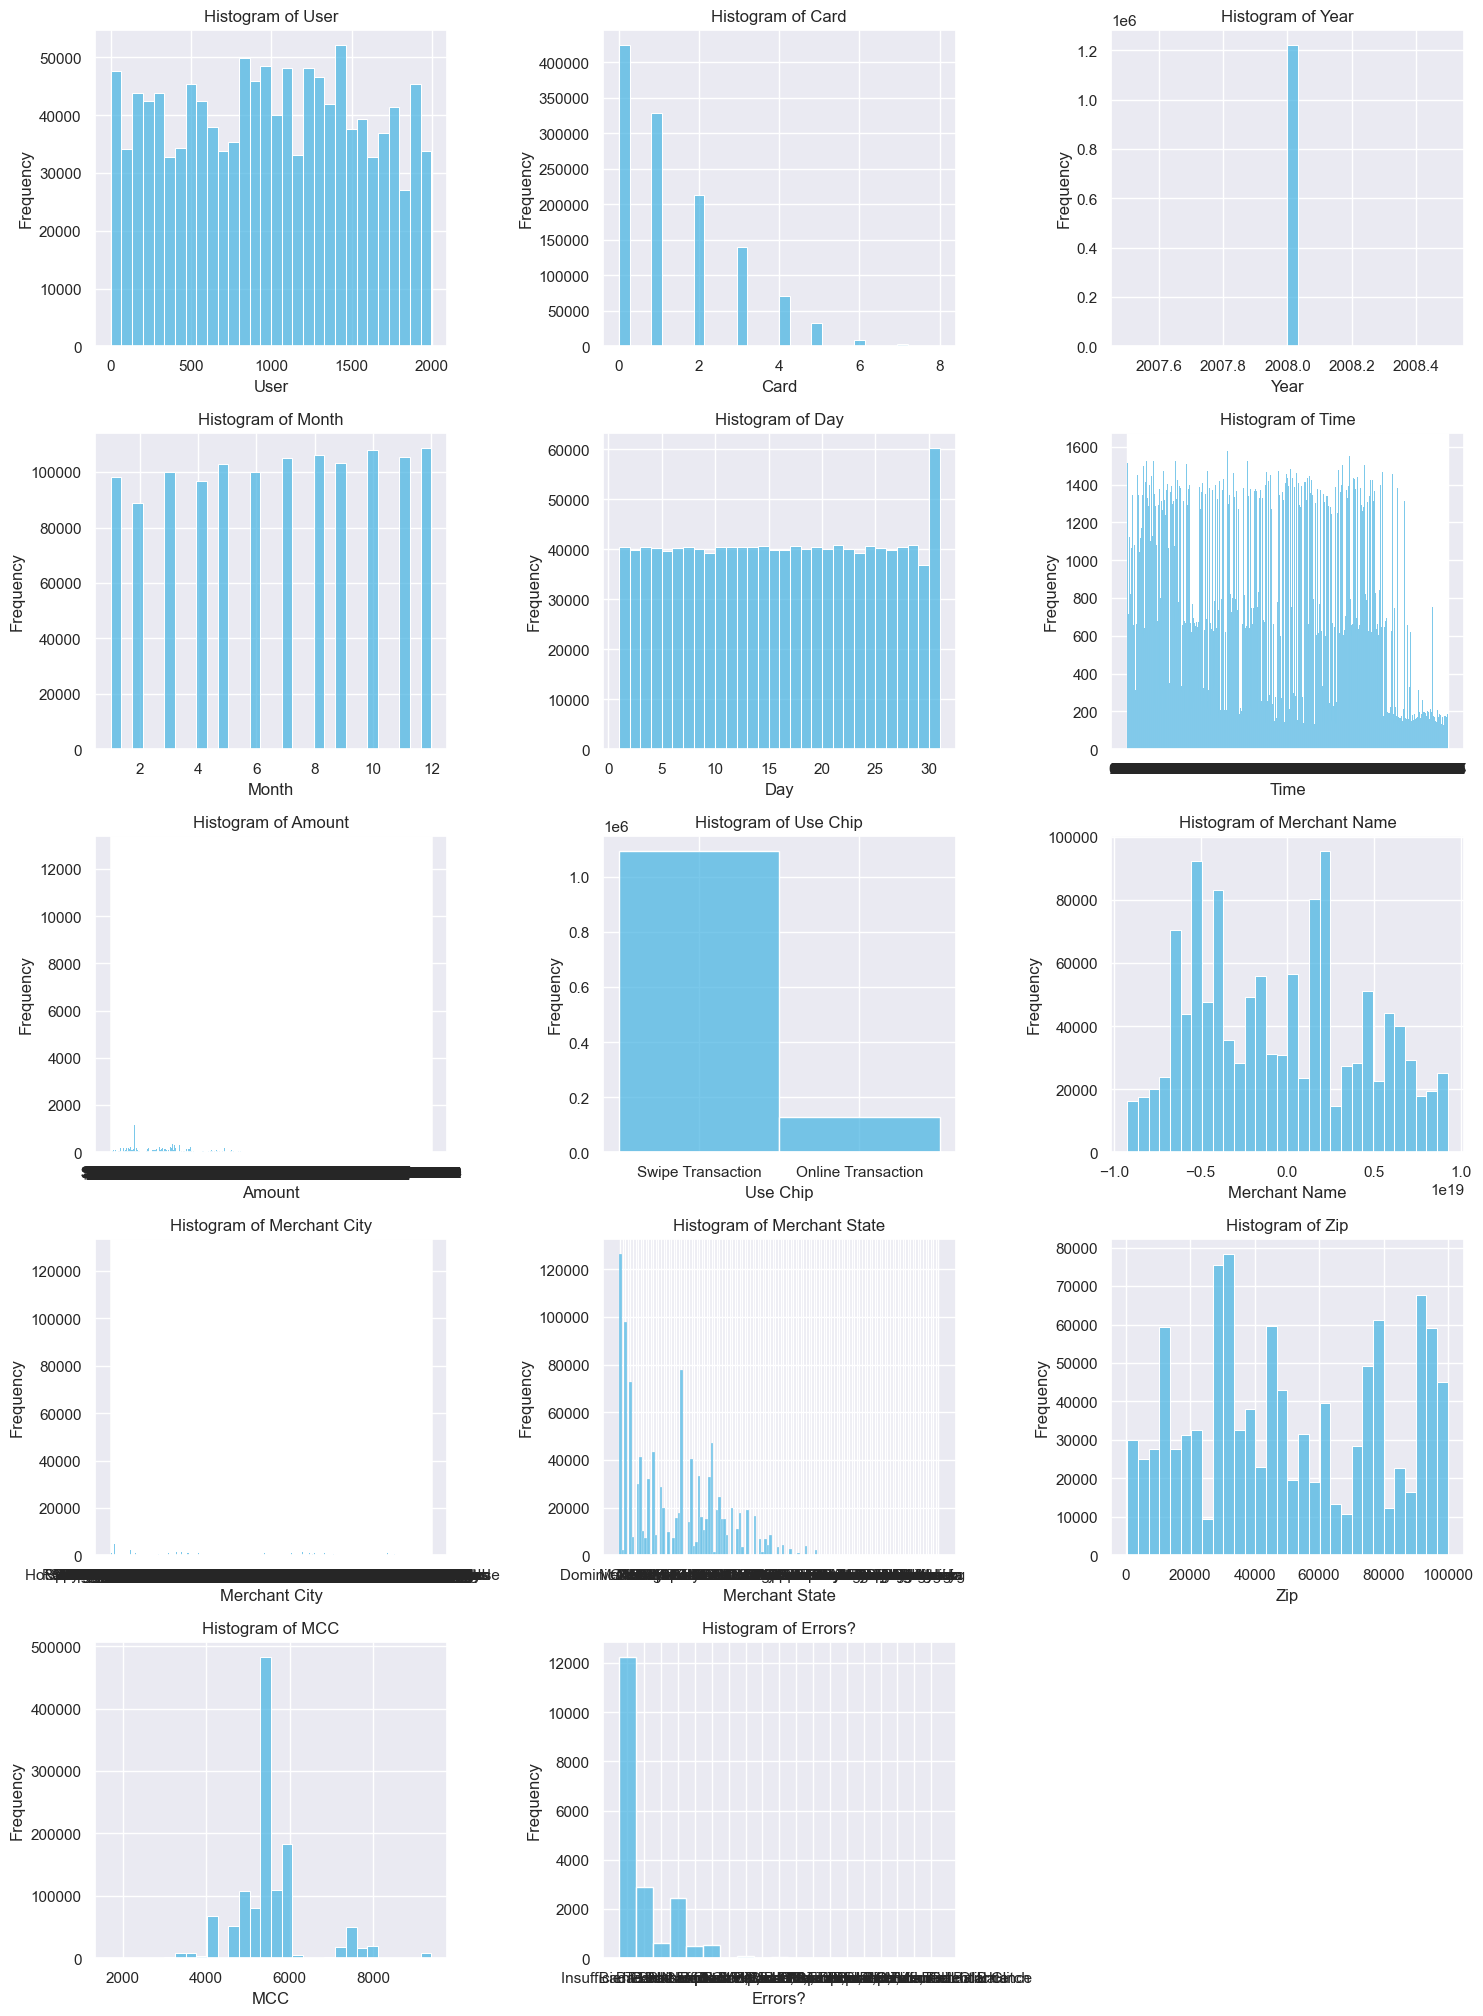

In [26]:
# Feature names
features = df_1.columns[:-1]

# Set up the figure; 10 rows (10*3=30 subplots), adjust as needed
fig, axes = plt.subplots(10, 3, figsize=(15, 40))

# Flatten axes array to loop through easily
axes = axes.flatten()

# Plot each feature in a separate subplot
for i, feature in enumerate(features):
    sns.histplot(df_1[feature], ax=axes[i], kde=False, bins=30)
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots if features < 30
for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

## About the Project

The code around this dataset is organized in the following way:

In [28]:
# project_root/
# │
# ├── Credit_Card_Fraud_Altman_Synth/
# │   ├── 01_Dataset_Introduction.ipynb       ← contains information about the dataset
# │   ├── 02_IsolationForest.ipynb           ← contains imports, loading, constants, feature‐transformation, isolation‐forest code, 
# │   │                                         background/data split, SHAP, LIME, explainability metrics, logging
# │   ├── 03_LocalOutlierFactor.ipynb         ← same structure, but with LOF code
# │   ├── 04_OneClassSVM.ipynb                ← same structure, but with OneClassSVM code
# │   ├── 05_Autoencoder.ipynb                ← same structure, but with AE code
# │   ├── 06_VariationalAutoencoder.ipynb     ← same structure, but with VAE code
# │   │                
# │   ├── joblib files (models)
# │   ├── pkl files (preprocessors)
# │   │                
# │   ├── processed_data
# │   │   └── npz files
# │   │   └── npy files
# │   │                
# │   └── results
# │       └── isolation_forest              ← exemplary, same for other 4 models
# │           └── explanations
# │           └── metrics
# │           └── model
# │           └── plots
# │
# └── datasets/
#     └── archive/
#         └── credit_card_transactions_ibm_v2_2008_prepped_merged.csv